### 🛀 1. Cleaning/ EDA 📊:

---

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import sklearn.metrics as sm
from sklearn.metrics import accuracy_score

In [2]:
# reading in the results file, we can see there's over 11,000 observations

df = pd.read_csv("results.csv", encoding = 'windows-1252') 
df

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11070,2021-22,2022-03-07T20:00:00Z,Tottenham,Everton,5,0,H,3.0,0.0,H,...,7.0,0.0,5.0,2.0,15.0,10.0,2.0,0.0,0.0,0.0
11071,2021-22,2022-03-10T19:30:00Z,Norwich,Chelsea,1,3,A,0.0,2.0,A,...,3.0,7.0,3.0,8.0,8.0,15.0,0.0,2.0,0.0,0.0
11072,2021-22,2022-03-10T19:30:00Z,Southampton,Newcastle,1,2,A,1.0,1.0,D,...,5.0,4.0,12.0,5.0,6.0,7.0,1.0,1.0,0.0,0.0
11073,2021-22,2022-03-10T19:30:00Z,Wolves,Watford,4,0,H,2.0,0.0,H,...,5.0,0.0,5.0,2.0,11.0,10.0,2.0,2.0,0.0,0.0


In [3]:
df.dtypes

Season       object
DateTime     object
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
FTR          object
HTHG        float64
HTAG        float64
HTR          object
Referee      object
HS          float64
AS          float64
HST         float64
AST         float64
HC          float64
AC          float64
HF          float64
AF          float64
HY          float64
AY          float64
HR          float64
AR          float64
dtype: object

In [4]:
df.columns

# we can see that a lot of the names are abbreviated, so lets change this for clarity

Index(['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC',
       'HF', 'AF', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [5]:
df = df.rename(columns={'Season': 'season', 'DateTime': 'datetime','HomeTeam': 'home', 
                        'AwayTeam': 'away','FTHG': 'home_goals', 
                        'FTAG': 'away_goals', 'FTR': 'result', 'HTHG': 'ht_home_goals',
                       'HTAG': 'ht_away_goals', 'HTR': 'ht_result', 'Referee': 'ref',
                       'HS': 'home_shots', 'AS': 'away_shots', 'HST': 'home_shots_target',
                       'AST': 'away_shots_target', 'HC': 'home_corners', 'AC': 'away_corners',
                       'HF': 'home_fouls', 'AF': 'away_fouls', 'HY': 'home_yellows',
                       'AY': 'away_yellows', 'HR': 'home_reds', 'AR': 'away_reds'})

df.columns # now the columns are all lowercase, and are clear to understand

Index(['season', 'datetime', 'home', 'away', 'home_goals', 'away_goals',
       'result', 'ht_home_goals', 'ht_away_goals', 'ht_result', 'ref',
       'home_shots', 'away_shots', 'home_shots_target', 'away_shots_target',
       'home_corners', 'away_corners', 'home_fouls', 'away_fouls',
       'home_yellows', 'away_yellows', 'home_reds', 'away_reds'],
      dtype='object')

In [6]:
# we can drop the referee column as it isnt significant to our model

df.drop(columns = ['ref'], inplace = True)
df.columns

Index(['season', 'datetime', 'home', 'away', 'home_goals', 'away_goals',
       'result', 'ht_home_goals', 'ht_away_goals', 'ht_result', 'home_shots',
       'away_shots', 'home_shots_target', 'away_shots_target', 'home_corners',
       'away_corners', 'home_fouls', 'away_fouls', 'home_yellows',
       'away_yellows', 'home_reds', 'away_reds'],
      dtype='object')

In [7]:
df.result.value_counts()
 # we can see the breakdown of the results by home wins, away wins and draws


H    5068
A    3148
D    2859
Name: result, dtype: int64

In [8]:
# lets create a home advantage variable to see the probability of winnung at home in the EPL
home_chance = (5068/11075) *100
home_chance # we can see there's a 45.8% chance of winning at home in the EPL

45.760722347629795

In [9]:
# here we do the same for away win likelihood- there is a 28.4% chance
away_chance = (3148/11075) * 100
away_chance

28.424379232505643

In [10]:
# here we do the same for draw likelihoo- there is a 25.8% chance
draw_chance = (2859/11075) * 100
draw_chance

25.814898419864562

In [11]:
# here we see some summary statistics of the entire dataset

df.describe(include = 'all') 

,season,datetime,home,away,home_goals,away_goals,result,ht_home_goals,ht_away_goals,ht_result,...,home_shots_target,away_shots_target,home_corners,away_corners,home_fouls,away_fouls,home_yellows,away_yellows,home_reds,away_reds
count,11075,11075,11075,11075,11075.000000,11075.000000,11075,10151.000000,10151.000000,10151,...,8251.000000,8251.00000,8251.000000,8251.000000,8251.000000,8251.000000,8251.000000,8251.000000,8251.000000,8251.000000
unique,29,3417,50,50,NaN,NaN,3,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1993-94,1994-12-31T00:00:00Z,Liverpool,Chelsea,NaN,NaN,H,NaN,NaN,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,462,11,550,551,NaN,NaN,5068,NaN,NaN,4233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.518736,1.140858,NaN,0.684760,0.500936,NaN,...,6.126288,4.77130,6.087141,4.784390,11.383711,11.880015,1.415101,1.747182,0.062780,0.089565
std,NaN,NaN,NaN,NaN,1.302422,1.135098,NaN,0.836438,0.721775,NaN,...,3.329181,2.79366,3.093930,2.731088,3.786662,3.958776,1.189514,1.268004,0.253336,0.297629
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,0.000000,NaN,...,4.000000,3.00000,4.000000,3.000000,9.000000,9.000000,0.000000,1.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000,0.000000,NaN,...,6.000000,4.00000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,1.000000,1.000000,NaN,...,8.000000,6.00000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000


In [12]:
df.isna().sum()

# we can see that we have many nulls in the data, this is something we need to rectify

season                  0
datetime                0
home                    0
away                    0
home_goals              0
away_goals              0
result                  0
ht_home_goals         924
ht_away_goals         924
ht_result             924
home_shots           2824
away_shots           2824
home_shots_target    2824
away_shots_target    2824
home_corners         2824
away_corners         2824
home_fouls           2824
away_fouls           2824
home_yellows         2824
away_yellows         2824
home_reds            2824
away_reds            2824
dtype: int64

In [13]:
df.dropna(inplace=True)
df.isna().sum()

# now we have zero nulls in the data

season               0
datetime             0
home                 0
away                 0
home_goals           0
away_goals           0
result               0
ht_home_goals        0
ht_away_goals        0
ht_result            0
home_shots           0
away_shots           0
home_shots_target    0
away_shots_target    0
home_corners         0
away_corners         0
home_fouls           0
away_fouls           0
home_yellows         0
away_yellows         0
home_reds            0
away_reds            0
dtype: int64

In [14]:
df.season.unique()
# the null values seem to be for all years before the 2000-01 season- as these stats weren't recorded then

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18',
       '2018-19', '2019-20', '2020-21', '2021-22'], dtype=object)

<AxesSubplot:>

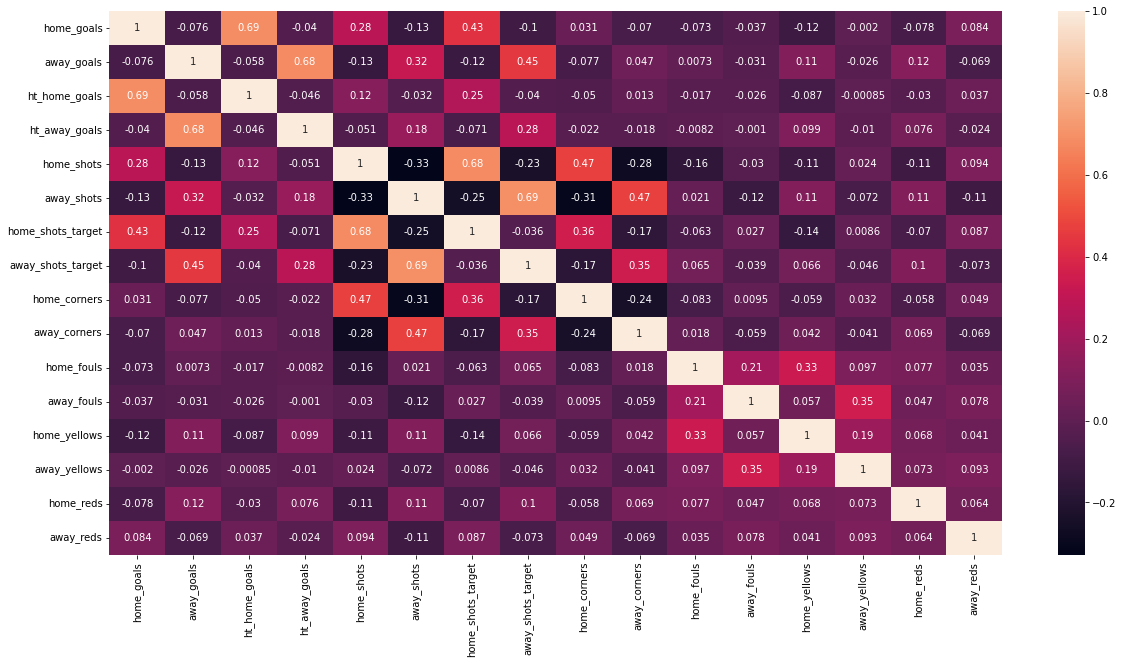

In [15]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot= True)

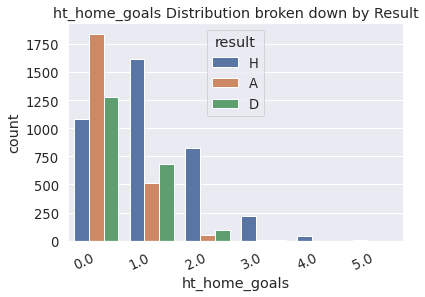

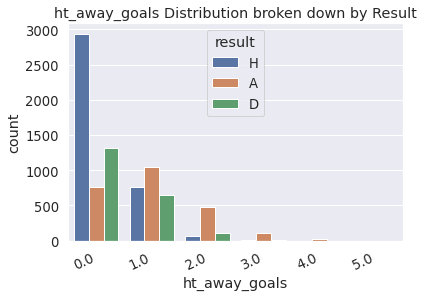

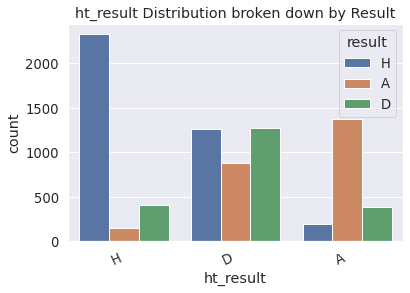

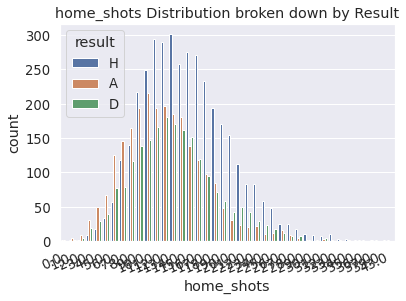

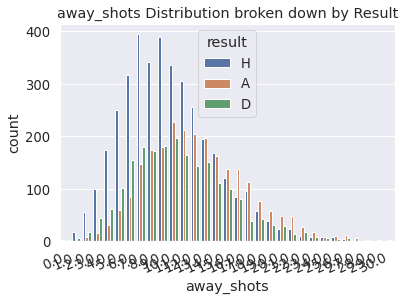

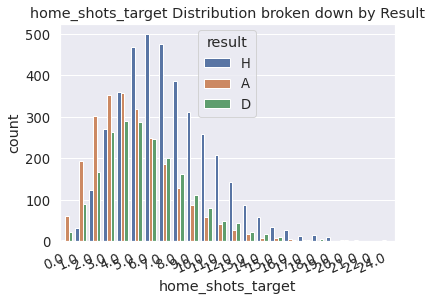

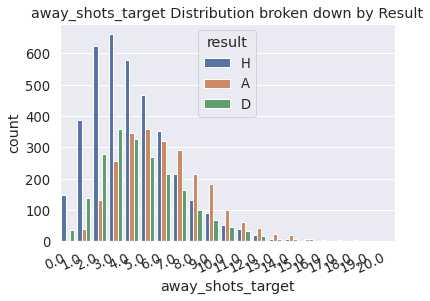

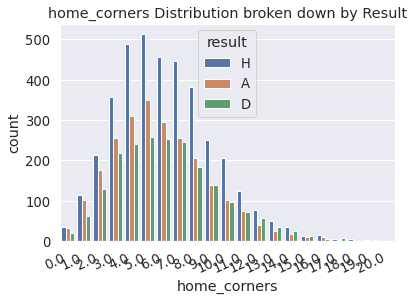

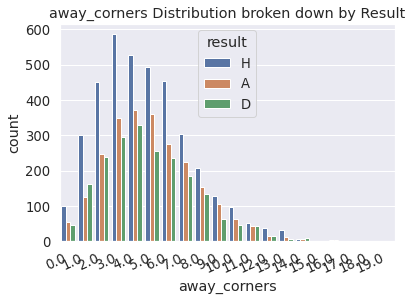

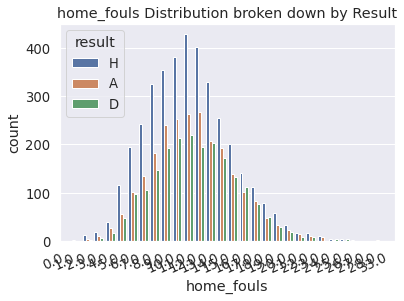

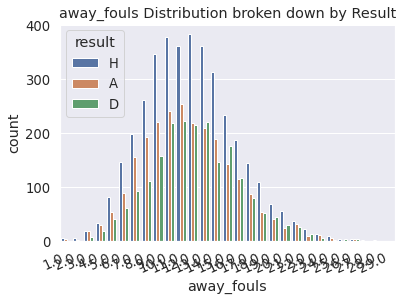

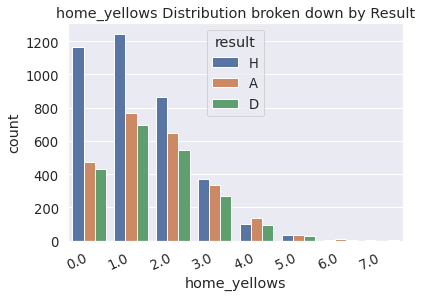

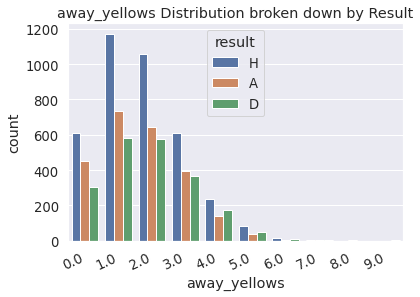

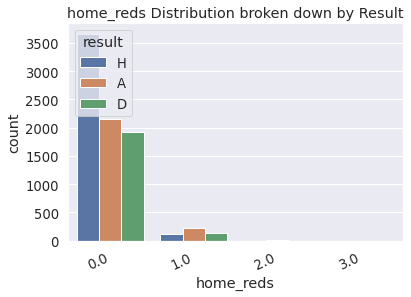

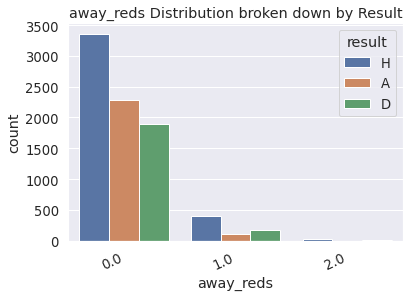

In [16]:
# a function/for loop used here to output distribution of certain features broken down by results

def grapher(col):
    
    colors = ['#163e67', '#67163d', '#3e6716']
    sns.color_palette(colors)
    sns.set_theme(style="ticks")
    sns.set_palette(sns.color_palette(colors))
    sns.set(font='DejaVu Sans',font_scale=1.2)
    g=sns.countplot    
    g(data=df,x= f'{col}',hue='result')
    plt.title(f'{col} Distribution broken down by Result')
    plt.xticks(rotation=25,horizontalalignment='right')
    plt.show()


selected_cols = ['ht_home_goals', 'ht_away_goals', 'ht_result', 'home_shots',
       'away_shots', 'home_shots_target', 'away_shots_target', 'home_corners',
       'away_corners', 'home_fouls', 'away_fouls', 'home_yellows',
       'away_yellows', 'home_reds', 'away_reds']
for key in selected_cols:
    grapher(key)

# ✅ EDA: 2001- PRESENT

## Total Goals Breakdown:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '2000-01'),
  Text(1, 0, '2001-02'),
  Text(2, 0, '2002-03'),
  Text(3, 0, '2003-04'),
  Text(4, 0, '2004-05'),
  Text(5, 0, '2005-06'),
  Text(6, 0, '2006-07'),
  Text(7, 0, '2007-08'),
  Text(8, 0, '2008-09'),
  Text(9, 0, '2009-10'),
  Text(10, 0, '2010-11'),
  Text(11, 0, '2011-12'),
  Text(12, 0, '2012-13'),
  Text(13, 0, '2013-14'),
  Text(14, 0, '2014-15'),
  Text(15, 0, '2015-16'),
  Text(16, 0, '2016-17'),
  Text(17, 0, '2017-18'),
  Text(18, 0, '2018-19'),
  Text(19, 0, '2019-20'),
  Text(20, 0, '2020-21'),
  Text(21, 0, '2021-22')])

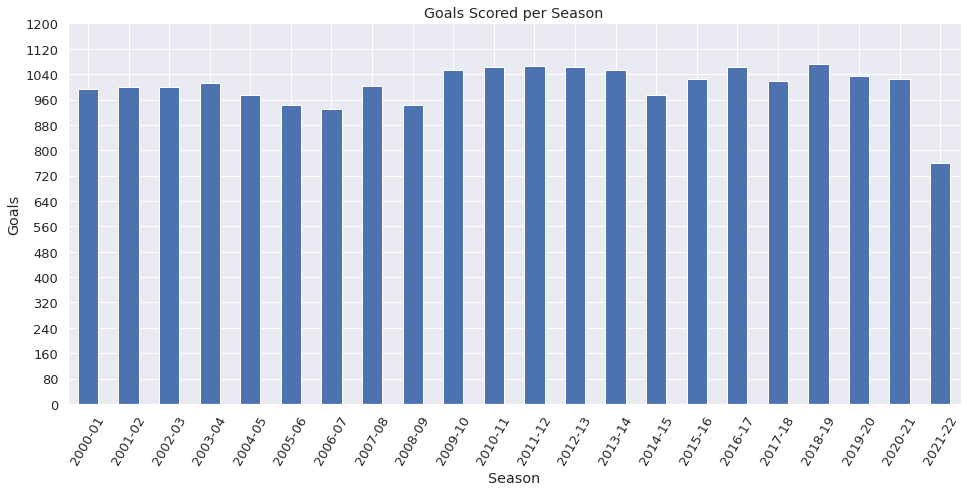

In [17]:
# here we have the total goals scored per season

df['total_match_goals'] = df['home_goals'] + df['away_goals']

df.groupby('season')['total_match_goals'].sum().plot(kind='bar',fontsize=13,figsize=(16,7),yticks=np.arange(0,1201,80)) 

plt.title("Goals Scored per Season")
plt.xlabel("Season")
plt.ylabel("Goals")
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '2000-01'),
  Text(1, 0, '2001-02'),
  Text(2, 0, '2002-03'),
  Text(3, 0, '2003-04'),
  Text(4, 0, '2004-05'),
  Text(5, 0, '2005-06'),
  Text(6, 0, '2006-07'),
  Text(7, 0, '2007-08'),
  Text(8, 0, '2008-09'),
  Text(9, 0, '2009-10'),
  Text(10, 0, '2010-11'),
  Text(11, 0, '2011-12'),
  Text(12, 0, '2012-13'),
  Text(13, 0, '2013-14'),
  Text(14, 0, '2014-15'),
  Text(15, 0, '2015-16'),
  Text(16, 0, '2016-17'),
  Text(17, 0, '2017-18'),
  Text(18, 0, '2018-19'),
  Text(19, 0, '2019-20'),
  Text(20, 0, '2020-21'),
  Text(21, 0, '2021-22')])

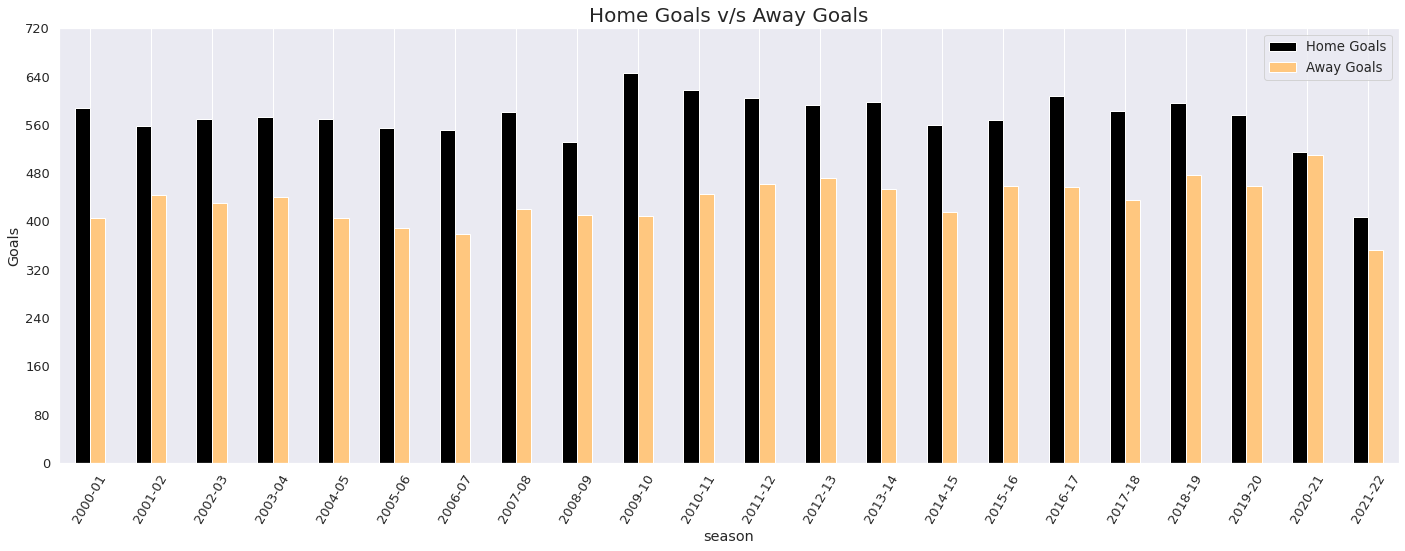

In [18]:
# here we have the home vs away goals broken down by season

df.groupby('season')[['home_goals','away_goals']].sum().plot(kind='bar',fontsize=13,figsize=(24,8),yticks=np.arange(0,721,80),colormap='copper')
plt.grid(axis='y')
plt.ylabel('Goals')
plt.legend(['Home Goals','Away Goals'])
plt.title("Home Goals v/s Away Goals",fontsize=20)
plt.xticks(rotation=60)

## Goals by Team Breakdown:

Text(0.5, 1.0, 'Total Goals by Teams')

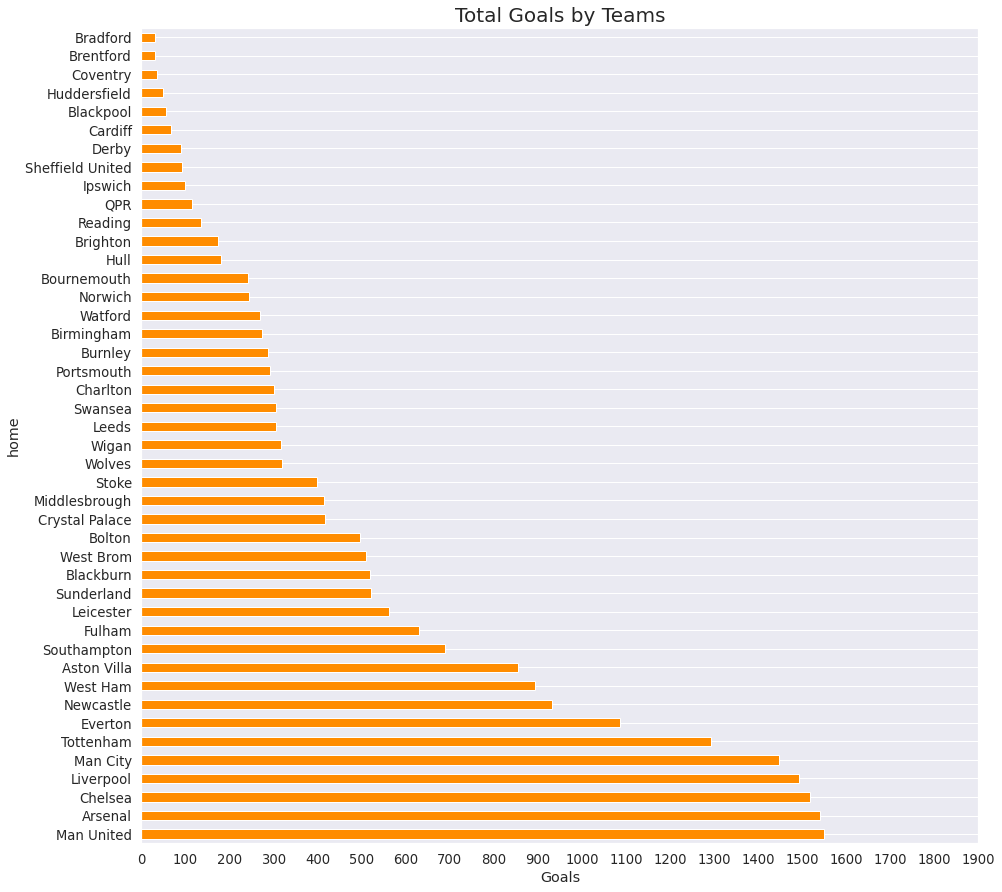

In [19]:
# here we have the total goals scored by team from 2001 onwards

tot_g = df.groupby('home')['home_goals'].sum() + df.groupby('away')['away_goals'].sum()
tot_g.sort_values(ascending=False).plot(kind='barh',figsize=(15,15),xticks=np.arange(0,1901,100),color='darkorange')
plt.grid(axis='x')
plt.xlabel("Goals")
plt.title("Total Goals by Teams",fontsize=20)

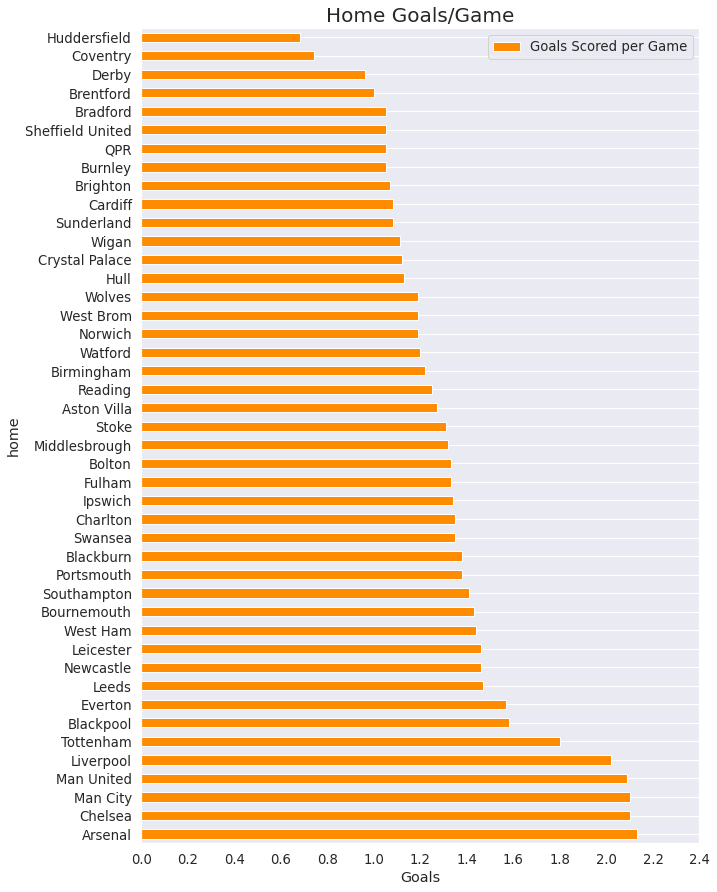

In [20]:
# here we have the home goals scored per game by team from 2001 onwards

goals_h_game= round(df.groupby('home')['home_goals'].sum()/df.groupby('home')['home'].count(),2)
goals_h_game.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,2.5,0.2),color='darkorange')
plt.grid(axis='x')
plt.xlabel("Goals")
plt.title("Home Goals/Game",fontsize=20)
plt.legend(['Goals Scored per Game'])

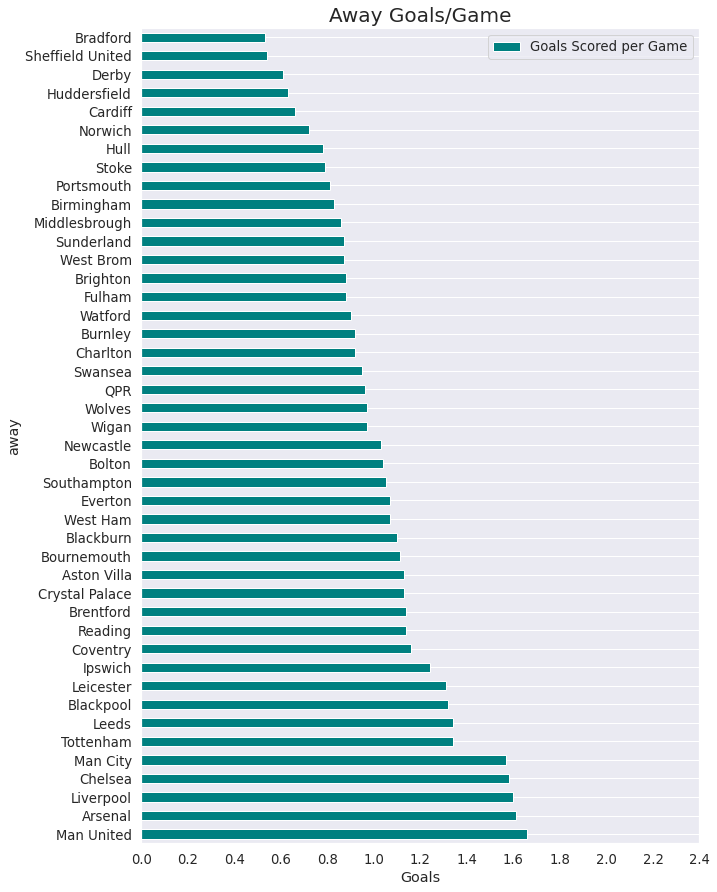

In [21]:
# here we have the away goals scored per game by team from 2001 onwards

goals_a_game= round(df.groupby('away')['away_goals'].sum()/df.groupby('away')['away'].count(),2)
goals_a_game.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,2.5,0.2),color='teal')
plt.grid(axis='x')
plt.xlabel("Goals")
plt.title("Away Goals/Game",fontsize=20)
plt.legend(['Goals Scored per Game'])

## Win/Loss/Draw Percentages:

Text(0.5, 1.0, 'Home Ground Win %')

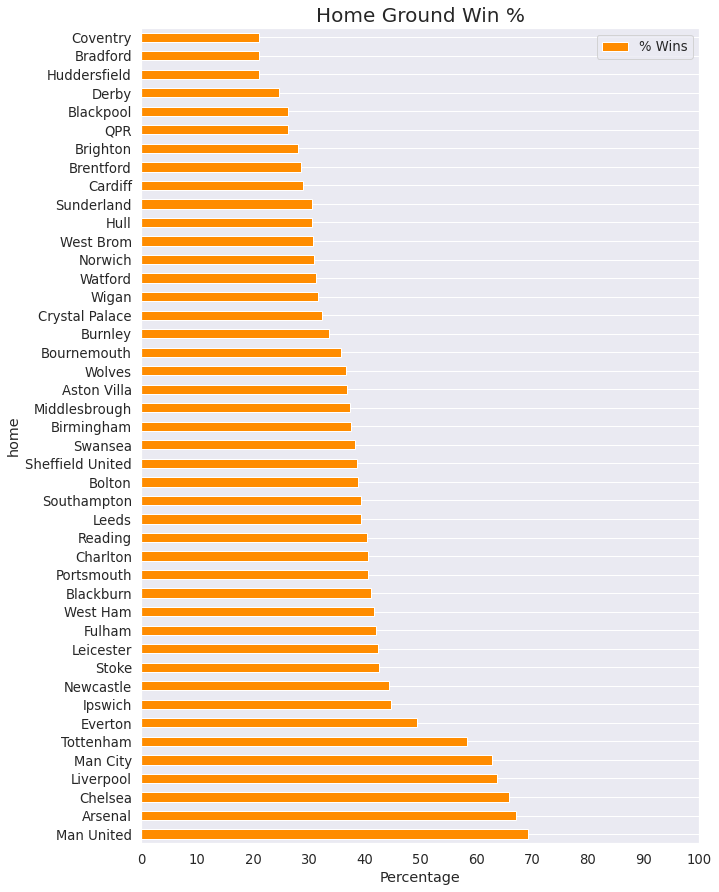

In [22]:
# here we have the home teams win percentage from 2001 onwards

home_win=100*round((df.loc[df['result']=='H'].groupby('home')['result'].count()/df.groupby('home')['result'].count()),3)
home_win.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,101,10),color='darkorange')
plt.grid(axis='x')
plt.xlabel('Percentage')
plt.legend(['% Wins'])
plt.title("Home Ground Win %",fontsize=20)

Text(0.5, 1.0, 'Home Ground Loss %')

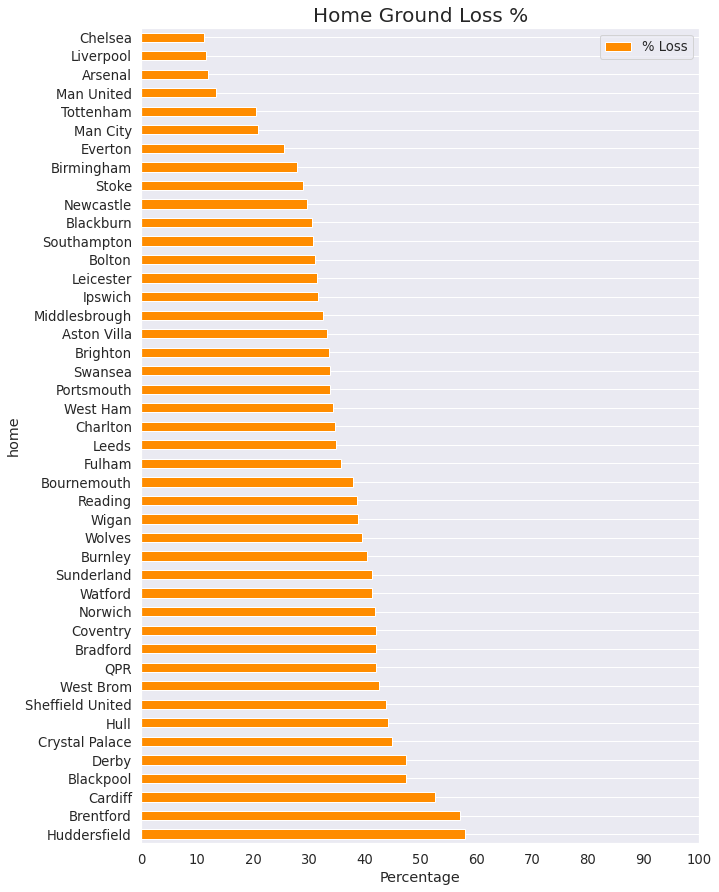

In [23]:
# here we have the home teams loss percentage from 2001 onwards

home_loss=100*round((df.loc[df['result']=='A'].groupby('home')['result'].count()/df.groupby('home')['result'].count()),3)
home_loss.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,101,10),color='darkorange')
plt.grid(axis='x')
plt.xlabel('Percentage')
plt.legend(['% Loss'])
plt.title("Home Ground Loss %",fontsize=20)

Text(0.5, 1.0, 'Home Ground Draw %')

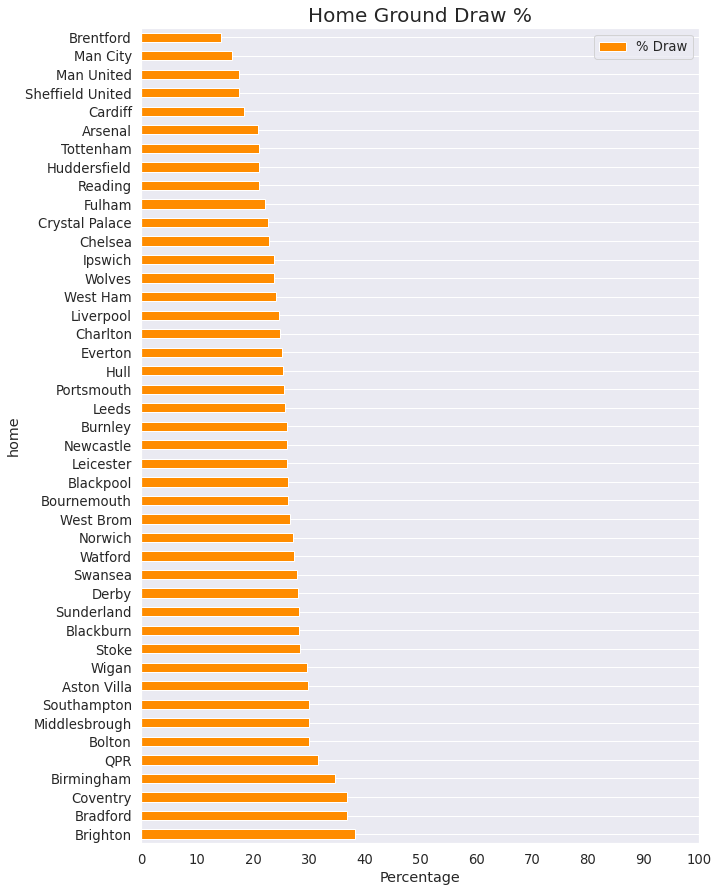

In [24]:
# here we have the home teams draw percentage from 2001 onwards

home_draw=100*round((df.loc[df['result']=='D'].groupby('home')['result'].count()/df.groupby('home')['result'].count()),3)
home_draw.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,101,10),color='darkorange')
plt.grid(axis='x')
plt.xlabel('Percentage')
plt.legend(['% Draw'])
plt.title("Home Ground Draw %",fontsize=20)

Text(0.5, 1.0, 'Away Ground Win %')

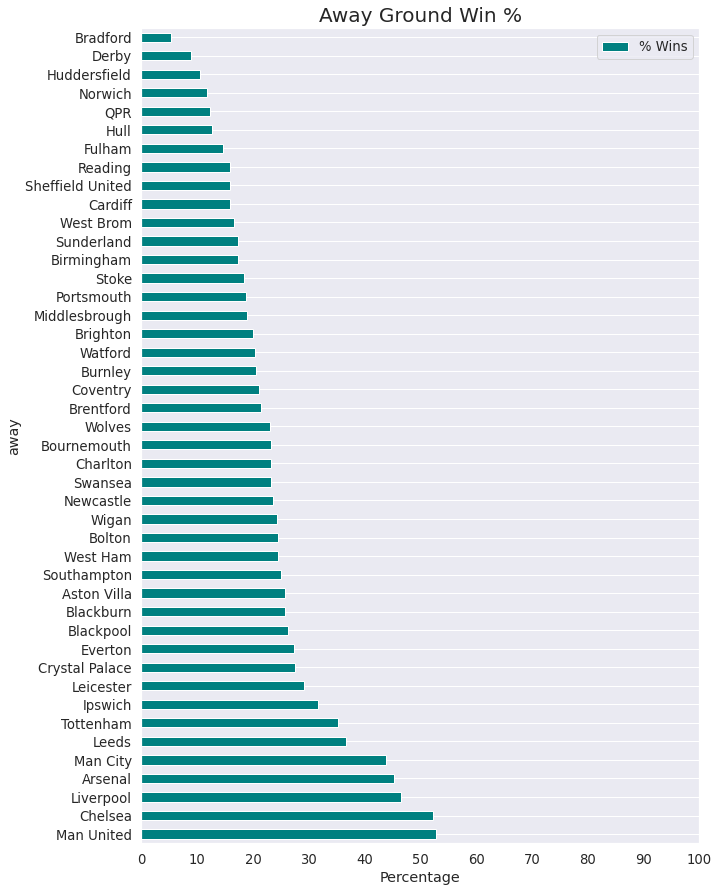

In [25]:
# here we have the away teams win percentage from 2001 onwards

away_win=100*round((df.loc[df['result']=='A'].groupby('away')['result'].count()/df.groupby('away')['result'].count()),3)
away_win.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,101,10),color='teal')
plt.grid(axis='x')
plt.xlabel('Percentage')
plt.legend(['% Wins'])
plt.title("Away Ground Win %",fontsize=20)

Text(0.5, 1.0, 'Away Ground Loss %')

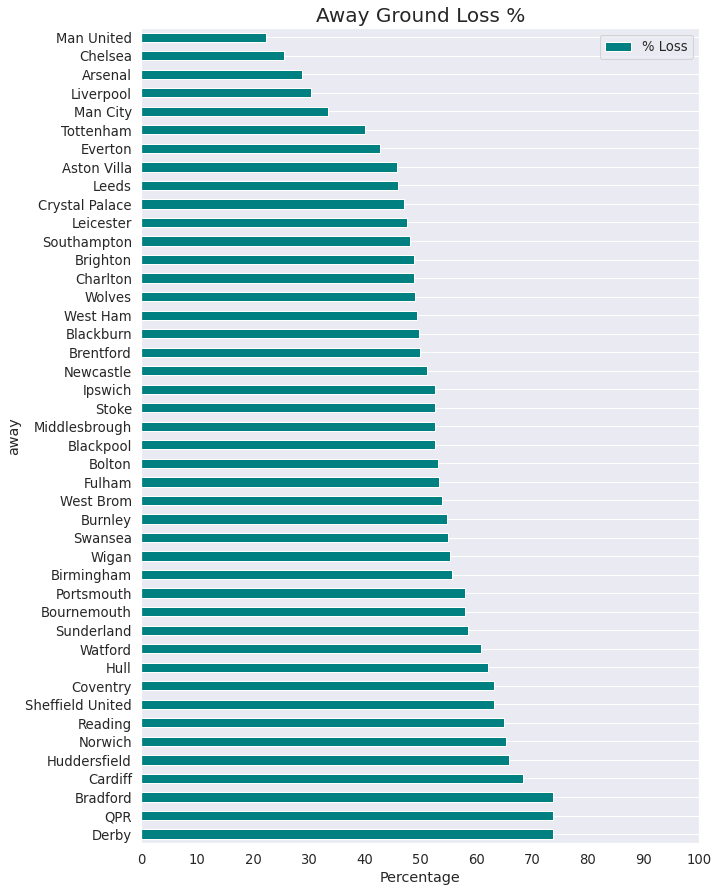

In [26]:
# here we have the away teams loss percentage from 2001 onwards

away_win=100*round((df.loc[df['result']=='H'].groupby('away')['result'].count()/df.groupby('away')['result'].count()),3)
away_win.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,101,10),color='teal')
plt.grid(axis='x')
plt.xlabel('Percentage')
plt.legend(['% Loss'])
plt.title("Away Ground Loss %",fontsize=20)

Text(0.5, 1.0, 'Away Ground Draw %')

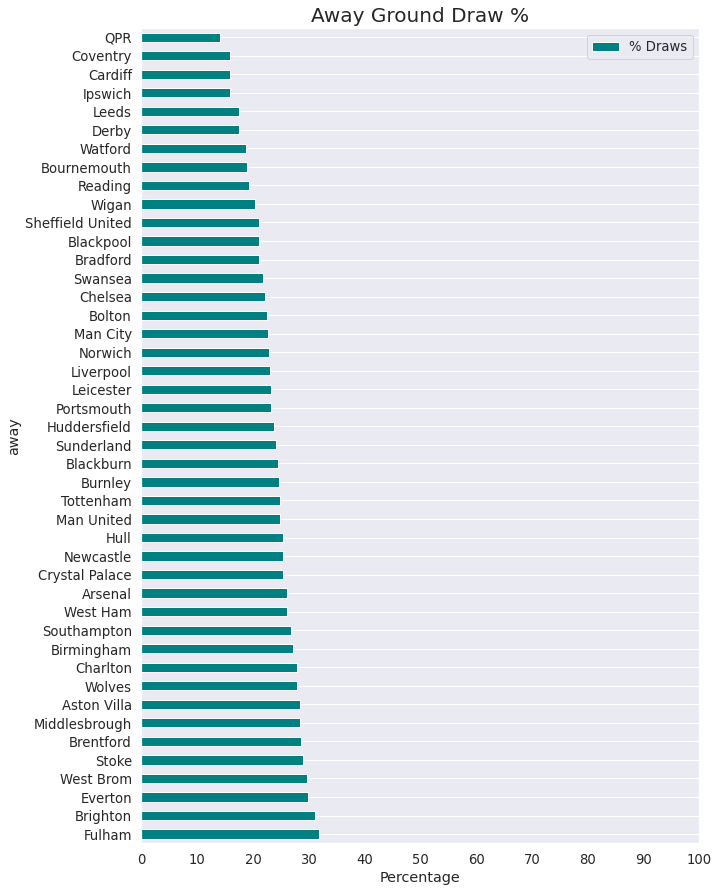

In [27]:
# here we have the away teams draw percentage from 2001 onwards

away_win=100*round((df.loc[df['result']=='D'].groupby('away')['result'].count()/df.groupby('away')['result'].count()),3)
away_win.sort_values(ascending=False).plot(kind='barh',figsize=(10,15),xticks=np.arange(0,101,10),color='teal')
plt.grid(axis='x')
plt.xlabel('Percentage')
plt.legend(['% Draws'])
plt.title("Away Ground Draw %",fontsize=20)

# Cleaning/EDA- Refined:

Now that we have finished working with and exploring the entire dataset, we can refine the dataset down to only the columns we need for the model. Then we can create a points table, so we can see the season by season trends, as well further exploring the data.

We also don't have the results after 10th March 2022. As there are only around 20 fixtures missing, I have decided to manually input these into an excel spreadsheet and then concatenate the missing data with the dataset. To make it easier, I have decided to drop all irrelevant columns (after my initial EDA didn't show me any particularly useful trends with those columns).

In [28]:
# we can drop these columns as they aren't significant to our model

df.drop(columns = ['ht_home_goals', 'ht_away_goals', 'ht_result', 'home_shots',
       'away_shots', 'home_shots_target', 'away_shots_target', 'home_corners',
       'away_corners', 'home_fouls', 'away_fouls', 'home_yellows',
       'away_yellows', 'home_reds', 'away_reds'], inplace = True)
df.columns

Index(['season', 'datetime', 'home', 'away', 'home_goals', 'away_goals',
       'result', 'total_match_goals'],
      dtype='object')

In [29]:
# slicing the datetime column so it only takes in dates.

df.datetime = df.datetime.str.slice(stop = 10)

In [30]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')
df.dtypes

season                       object
datetime             datetime64[ns]
home                         object
away                         object
home_goals                    int64
away_goals                    int64
result                       object
total_match_goals             int64
dtype: object

In [31]:
latest = pd.read_csv("latest_results.csv")

latest['datetime'] = pd.to_datetime(latest['datetime'], format='%Y-%m-%d')
latest.dtypes

season                       object
datetime             datetime64[ns]
home                         object
away                         object
home_goals                    int64
away_goals                    int64
result                       object
total_match_goals             int64
dtype: object

In [32]:
df = pd.concat([df,latest])
df

,season,datetime,home,away,home_goals,away_goals,result,total_match_goals
2824,2000-01,2000-08-19,Charlton,Man City,4,0,H,4
2825,2000-01,2000-08-19,Chelsea,West Ham,4,2,H,6
2826,2000-01,2000-08-19,Coventry,Middlesbrough,1,3,A,4
2827,2000-01,2000-08-19,Derby,Southampton,2,2,D,4
2828,2000-01,2000-08-19,Leeds,Everton,2,0,H,2
...,...,...,...,...,...,...,...,...
33,2021-22,2022-04-09,Aston Villa,Tottenham,0,4,A,4
34,2021-22,2022-04-10,Brentford,West Ham,2,0,H,2
35,2021-22,2022-04-10,Leicester,Crystal Palace,2,1,H,3
36,2021-22,2022-04-10,Norwich,Burnley,2,0,H,2


## Points table:

### Home Stats:

In [33]:
# Getting total Home Games, Wins, Draws and Losses

hp = df.groupby(['season','home'])['result'].count().rename("HP")
hw = df[df['result'] =='H'].groupby(['season','home'])['result'].count().rename("HW")
hl = df[df['result'] =='A'].groupby(['season','home'])['result'].count().rename("HL")
hd = df[df['result'] =='D'].groupby(['season','home'])['result'].count().rename("HD")
home_games=pd.concat([hp,hw,hl,hd],axis=1).reset_index()
home_games.fillna(0,inplace=True)
home_games[['HP','HL','HD','HW']]=home_games[['HP','HL','HD','HW']].astype(int)


# Getting Total Goals scored and conceded by Home Teams per Season (Full Time and Half Time)

home_score= df.groupby(['season','home'])['away_goals','home_goals'].sum().astype(int).reset_index()
home_score.rename(columns={'home_goals':'HG For','away_goals':'HG Against'},inplace=True)

home_df=pd.merge(left=home_games,right=home_score,on=['season','home'],how='left')

C:\Users\PRANAV~1\AppData\Local\Temp/ipykernel_13576/1290118144.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  home_score= df.groupby(['season','home'])['away_goals','home_goals'].sum().astype(int).reset_index()


### Away Stats:

In [34]:
# Getting total Away Games, Wins, Draws and Losses

ap = df.groupby(['season','away'])['result'].count().rename("AP")
aw = df[df['result'] =='A'].groupby(['season','away'])['result'].count().rename("AW")
al = df[df['result'] =='H'].groupby(['season','away'])['result'].count().rename("AL")
ad = df[df['result'] =='D'].groupby(['season','away'])['result'].count().rename("AD")
away_games=pd.concat([ap,aw,al,ad],axis=1).reset_index()
away_games.fillna(0,inplace=True)   ##NaN comes where theere are 0 games as groupby misses that entry
away_games[['AP','AL','AD','AW']]=away_games[['AP','AL','AD','AW']].astype(int)



# Getting Total Goals scored and conceded by Away Teams per Season (Full Time and Half Time)

away_score=df.groupby(['season','away'])['away_goals','home_goals'].sum().astype(int).reset_index()
away_score.rename(columns={'home_goals':'AG Against','away_goals':'AG For'}, inplace=True)

away_df=pd.merge(left=away_games,right=away_score,on=['season','away'],how='left')

C:\Users\PRANAV~1\AppData\Local\Temp/ipykernel_13576/1286678927.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  away_score=df.groupby(['season','away'])['away_goals','home_goals'].sum().astype(int).reset_index()


### Final Table:

In [35]:
##Final Points Table (Home and Away)

pt_table = pd.merge(left=home_df,right=away_df,left_on=['season','home'],right_on=['season','away']).drop(['away'],axis=1)
pt_table.rename(columns={'home':'Team'},inplace=True)
pt_table['Total Played'] = pt_table['HP'] + pt_table['AP']
pt_table['Total Wins'] = pt_table['HW'] + pt_table['AW']
pt_table['Total Loss'] = pt_table['HL'] + pt_table['AL']
pt_table['Total Draw'] = pt_table['HD'] + pt_table['AD']
pt_table['GF'] = pt_table['HG For'] + pt_table['AG For']
pt_table['GA'] = pt_table['HG Against'] + pt_table['AG Against']
pt_table['GD'] = pt_table['GF'] - pt_table['GA']
pt_table['Total_Points'] = 3*pt_table['Total Wins'] + pt_table['Total Draw']  ## 3 Points for a Win and 1 Point for a Draw.


## Ranking the teams
pt_table['Rank']= pt_table.groupby('season')['Total_Points'].rank(method='min',ascending=False)
pt_table['fin'] = pt_table.groupby(['season','Rank'])['GD'].rank(method='first',ascending=False)  ## If points are same, use goal difference
pt_table['Rank']=np.where((pt_table['fin'] > 1),(pt_table['Rank']+pt_table['fin'] - 1),pt_table['Rank'])
pt_table.drop('fin',axis=1,inplace=True)

In [36]:
current_season = pt_table[pt_table['season']=='2021-22'].sort_values(by='Rank')[['season','Team','Total Played','Total Wins','Total Loss','Total Draw','GF','GA','GD','Total_Points','Rank']]
current_season

,season,Team,Total Played,Total Wins,Total Loss,Total Draw,GF,GA,GD,Total_Points,Rank
431,2021-22,Man City,31,23,3,5,72,20,52,74,1.0
430,2021-22,Liverpool,31,22,2,7,79,22,57,73,2.0
425,2021-22,Chelsea,30,18,4,8,64,23,41,62,3.0
436,2021-22,Tottenham,31,18,10,3,56,37,19,57,4.0
420,2021-22,Arsenal,30,17,10,3,45,36,9,54,5.0
438,2021-22,West Ham,32,15,11,6,51,42,9,51,6.0
432,2021-22,Man United,31,14,8,9,49,42,7,51,7.0
439,2021-22,Wolves,32,15,13,4,33,28,5,49,8.0
429,2021-22,Leicester,29,11,11,7,45,48,-3,40,9.0
426,2021-22,Crystal Palace,31,8,10,13,43,40,3,37,10.0


## Winners by Season:

[Text(0, 0, '2000-01'),
 Text(1, 0, '2001-02'),
 Text(2, 0, '2002-03'),
 Text(3, 0, '2003-04'),
 Text(4, 0, '2004-05'),
 Text(5, 0, '2005-06'),
 Text(6, 0, '2006-07'),
 Text(7, 0, '2007-08'),
 Text(8, 0, '2008-09'),
 Text(9, 0, '2009-10'),
 Text(10, 0, '2010-11'),
 Text(11, 0, '2011-12'),
 Text(12, 0, '2012-13'),
 Text(13, 0, '2013-14'),
 Text(14, 0, '2014-15'),
 Text(15, 0, '2015-16'),
 Text(16, 0, '2016-17'),
 Text(17, 0, '2017-18'),
 Text(18, 0, '2018-19'),
 Text(19, 0, '2019-20'),
 Text(20, 0, '2020-21'),
 Text(21, 0, '2021-22')]

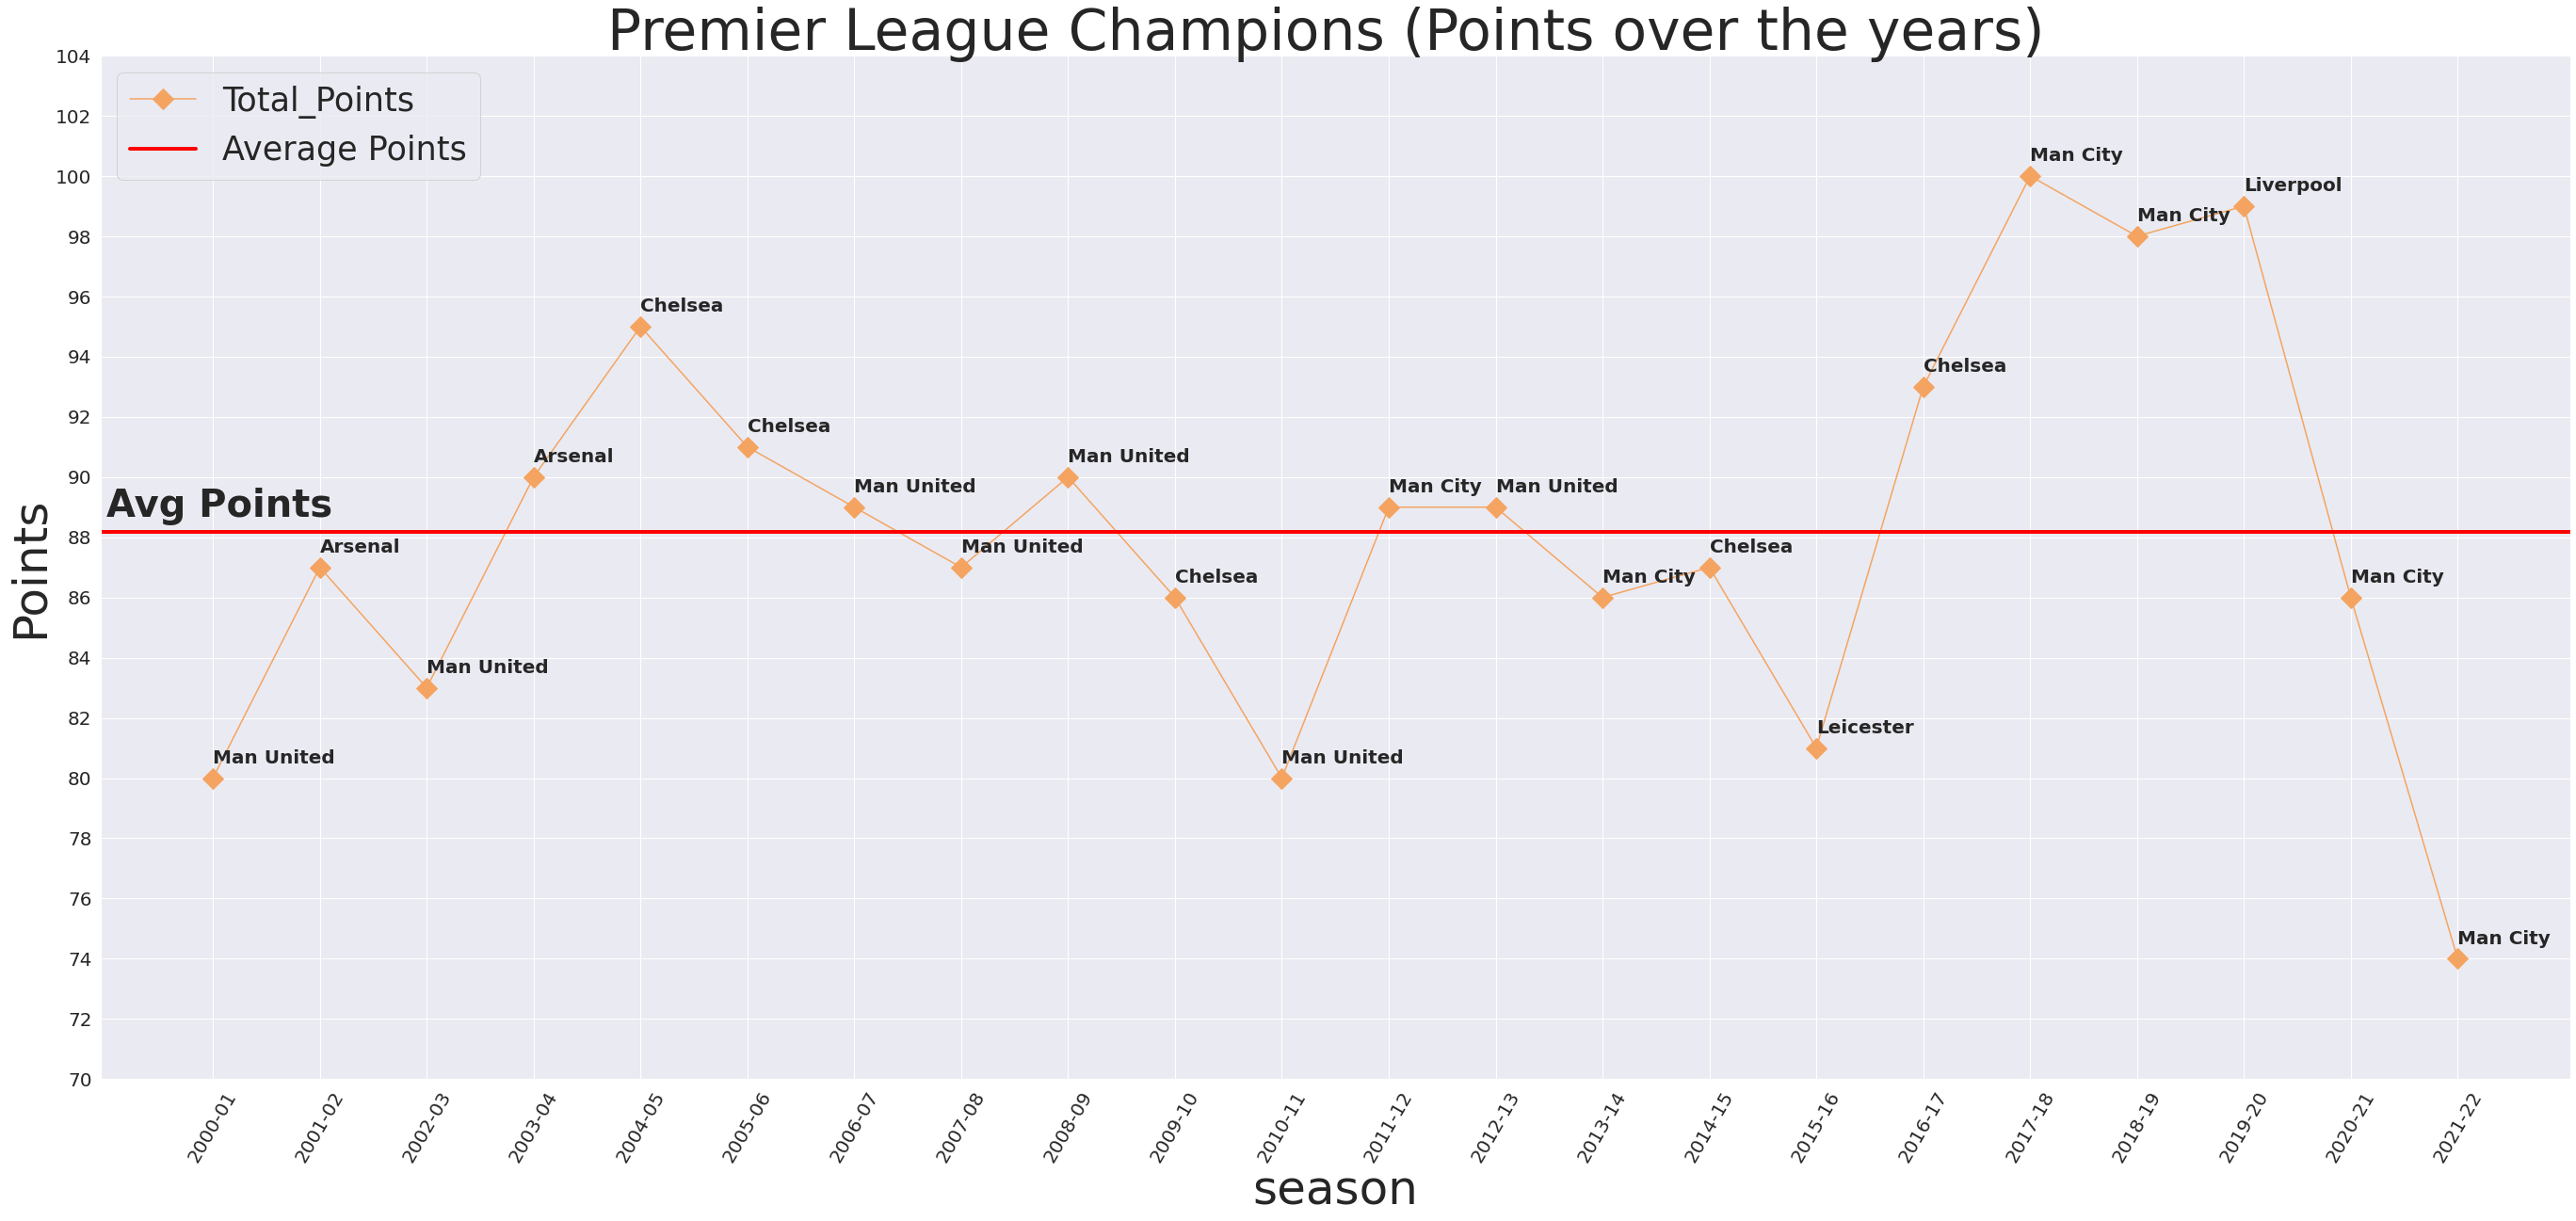

In [37]:
top = pt_table[(pt_table['Rank']==1)]
top.set_index('season',drop=True,inplace=True)
top = top.reset_index()
ax = top.plot(kind='line',color='sandybrown',y='Total_Points',grid=True,figsize=(47,20),label='Total_Points',linestyle='-',marker='D',markevery=1,markersize=15, fillstyle='full',markerfacecolor='sandybrown')
plt.axhline(y=top['Total_Points'].mean(),color='red',label='Average Points',linewidth=4)
plt.yticks(np.arange(70,105,2),fontsize=20)
plt.annotate('Avg Points',(-1,top['Total_Points'].mean() + 0.5),fontsize = 40,fontweight='bold')
a=0
for index,row in top.iterrows():
    b=row.Total_Points
    plt.annotate(row.Team,(a,b+.5),fontsize=20,fontweight='bold')
    a=a+1
plt.xlabel('season',fontsize=50)
plt.ylabel('Points',fontsize=50)
plt.title('Premier League Champions (Points over the years) ',fontsize=60)
plt.legend(loc=2,fontsize=35)
plt.xticks(top.index,rotation=60,fontsize=20)
ax.set_xticklabels(top['season'])

In [38]:
df.to_csv('cleaned_data.csv', index = False )